### import os for  operating system operations e.g., creating a folder

In [39]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [40]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [41]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [42]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [43]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [44]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [45]:
true_values = dataset['WIND-DIRECTION']
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [46]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,66.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,48.207576,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,16.390328,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,33.300000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,61.350000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


### Check for null and NaN values

In [47]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN               252
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

In [48]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

### copy dataset

In [49]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [50]:

df = dataset[:]

### remove the date column

In [51]:

del df['DATE']

In [52]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [53]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [54]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [55]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(190, 7)
(128, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [56]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(64, 7)
(64, 7)


In [57]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (190, 7)
Test dataset       : (64, 7)
Validation dataset : (64, 7)


## Plot the relationship between each two variables to spot anything incorrect.

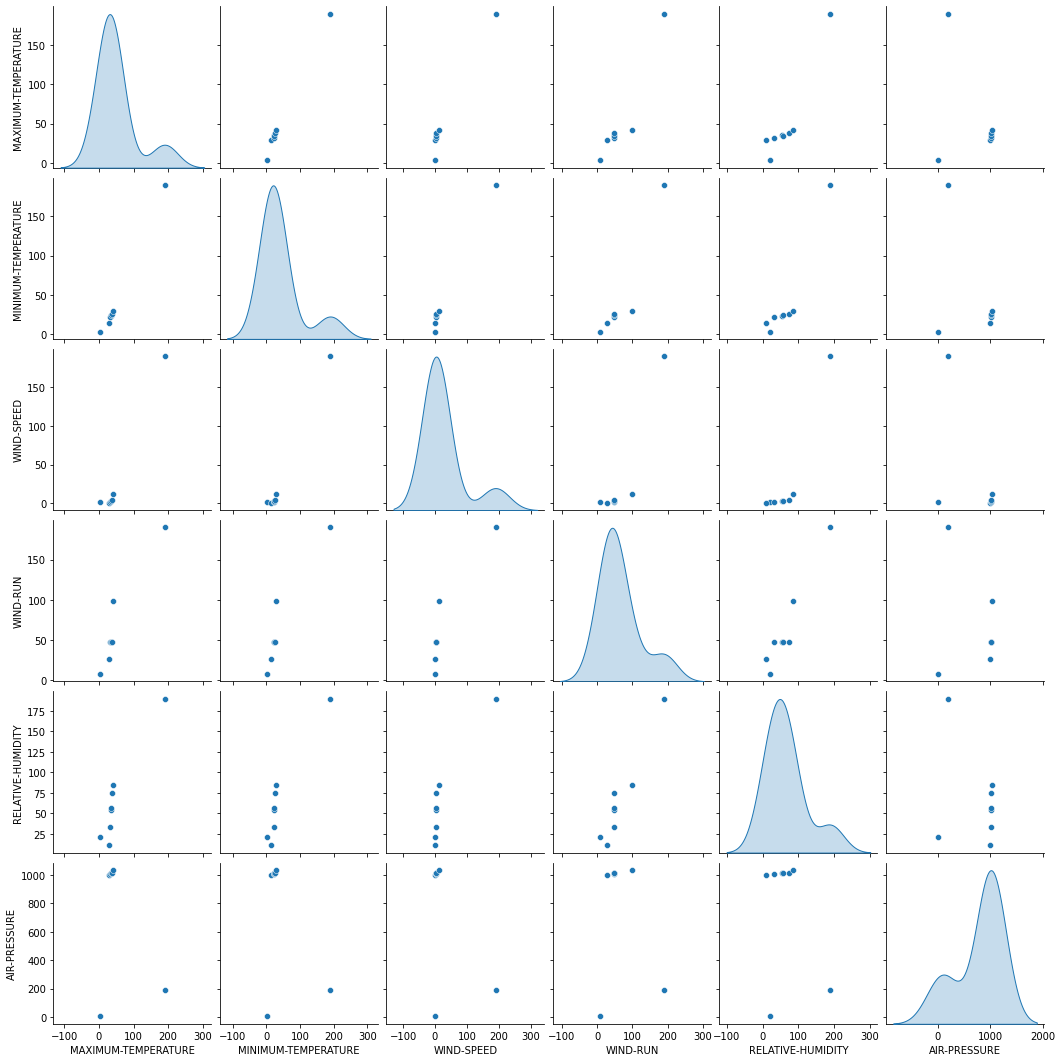

In [58]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [59]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count    190.000000
mean     167.594737
std       54.116462
min       58.000000
25%      122.250000
50%      170.000000
75%      204.750000
max      307.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-DIRECTION"

In [60]:
train_labels = train_dataset.pop('WIND-DIRECTION')
test_labels = test_dataset.pop('WIND-DIRECTION')
valid_labels = valid_dataset.pop('WIND-DIRECTION')

## Data Normalization/Scaling

## Subtract the mean of the training data and divide by the standard deviation

### define a function to normalize the data set.

In [61]:


from sklearn.preprocessing import MinMaxScaler

def norm(x):
    cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-SPEED','RELATIVE-HUMIDITY','WIND-RUN','AIR-PRESSURE']
    scaler = MinMaxScaler()
    x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
    return x
      #return (x - train_stats['mean'] / train_stats['std'])
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [62]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (190, 6) 
Test        : (64, 6) 
Validate    : (64, 6) 
Train/Test/Validate labels: 
Train Labels : (190,)
Test Labels  : (64,)
Test Labels  : (64,)


## show a sample of the data after normalized

In [63]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
31,0.193548,0.619355,0.285714,0.289916,0.878378,0.370920
151,0.120968,0.625806,0.107143,0.289916,1.000000,0.356083
84,0.217742,0.296774,0.196429,0.289916,0.256757,0.409496
58,0.500000,0.412903,0.196429,0.289916,0.581081,0.323442
239,0.475806,0.270968,0.375000,0.289916,0.297297,0.373887
163,0.120968,0.670968,0.285714,0.289916,0.797297,0.350148
178,0.467742,0.406452,0.464286,0.289916,0.391892,0.353116
54,0.177419,0.651613,0.196429,0.289916,0.891892,0.356083
284,0.161290,0.664516,0.133929,0.480392,0.905405,0.169139
197,0.427419,0.722581,0.553571,0.289916,0.702703,0.347181


## Build a Neural Network Model

### We declared a function for creating a model.

In [64]:


def model1_single_layer_perceptron():
    model = keras.Sequential([
       keras.layers.Dense(1,input_shape=(6,)) 
    ])
    model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse','mape'])
    
    return model
    
        

In [65]:
model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

Here is a summary of this model: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


## import NN and other components.

In [66]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [67]:
def model2_multilayer_perceptron_with_one_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 10 Neurons
      model.add(Dense(10, input_shape =(normed_train_data.shape[1],)))
      model.add(Dropout(0.5))
      model.add(Dense(35, Activation('relu'))) # Hidden layer 1
      model.add(Dropout(0.5))
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model


In [68]:
model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                70        
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 35)                385       
_________________________________________________________________
dropout_6 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [69]:
def model3_multilayer_perceptron_with_four_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(32, Activation('relu'))) # Hidden layer 1
      model.add(Dropout(0.5))
      model.add(Dense(64, Activation('relu'))) # Hidden layer 2
      model.add(Dense(72, Activation('relu'))) # Hidden layer 3
      model.add(Dropout(0.5))
      model.add(Dense(80, Activation('relu'))) # Hidden layer 4
      model.add(Dropout(0.5))
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [70]:
model3 = model3_multilayer_perceptron_with_four_hidden_layer()
print('Here is a summary of this model: ')


model3.summary()


Here is a summary of this model: 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_8 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_19 (Dense)    

## Test the model before training (this will use the initial weights)

In [71]:

example_result_1 = model1.predict(normed_test_data) # Here we are using the single layer perceptron model



## Compare the predicted values with the actual values 

In [72]:
print('Predicted Values')
print(example_result_1[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[ 0.03793091]
 [-0.08107512]
 [ 0.02659485]
 [ 0.04553877]
 [ 0.08424979]
 [-0.00788516]
 [-0.05390661]
 [-0.0126629 ]
 [-0.13396089]
 [ 0.06870812]]

Actual Values
165
150
160
105
214
 94
 90
 64
250
 90


## Save checkpoints during training

In [73]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

## Training the model we built above.

### Training the single layer perceptron

In [74]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [75]:
%%time

EPOCHS = 1000
batch_size = 6

model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

with tf.device('/CPU:0'):
    history = model1.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:22857.1973,  mae:143.9251,  mape:99.9206,  mse:22857.1973,  val_loss:32435.4570,  val_mae:170.9713,  val_mape:99.6542,  val_mse:32435.4570,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wi

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets

Epoch: 100, loss:39129.1680,  mae:183.6717,  mape:99.6571,  mse:39129.1680,  val_loss:32288.7988,  val_mae:170.5483,  val_mape:99.3764,  val_mse:32288.7949,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tens

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets

Epo

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

In [76]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,14099.360352,116.775047,14099.360352,97.281029,30997.041016,166.776169,30997.041016,96.898544,995
996,39576.667969,191.755127,39576.667969,98.070183,30995.662109,166.772095,30995.662109,96.895866,996
997,32423.130859,172.752930,32423.130859,97.854881,30994.275391,166.767975,30994.275391,96.893188,997
998,30221.507812,163.084290,30221.507812,97.831078,30992.890625,166.763885,30992.890625,96.890503,998
999,24211.791016,150.595657,24211.791016,97.744423,30991.529297,166.759872,30991.529297,96.887856,999


In [77]:
# Test the model after training
example_result_2 = model1.predict(normed_test_data)

## Compare the predicted values with the actual values

In [78]:
print('Predicted Values')
print(example_result_2[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[3.9845939]
 [2.3681293]
 [4.800747 ]
 [4.1440153]
 [4.3281918]
 [3.8953087]
 [2.219904 ]
 [3.461192 ]
 [2.7655098]
 [4.0083733]]

Actual Values
165
150
160
105
214
 94
 90
 64
250
 90


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

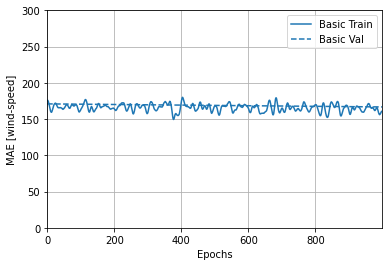

In [79]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,300])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

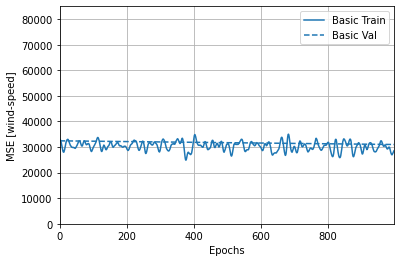

In [80]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,85000])
plt.ylabel('MSE [wind-speed]')

In [81]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model1.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 1s - loss: 29828.6953 - mae: 164.1314 - mse: 29828.6953 - mape: 97.7181
Train set Mean Abs Error : 164.13
Train set Mean Square Error : 29828.70


In [82]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 1s - loss: 30991.5293 - mae: 166.7599 - mse: 30991.5293 - mape: 96.8879
Validation set Mean Abs Error : 166.76
Validation set Mean Square Error : 30991.53


In [83]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 1s - loss: 25090.4727 - mae: 150.1444 - mse: 25090.4727 - mape: 97.1192
Testing set Mean Abs Error : 150.14
Testing set Mean Square Error : 25090.47


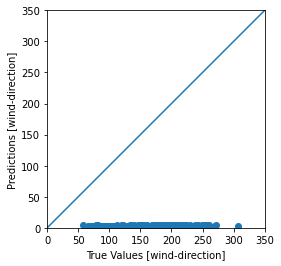

In [84]:
train_predictions = model1.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

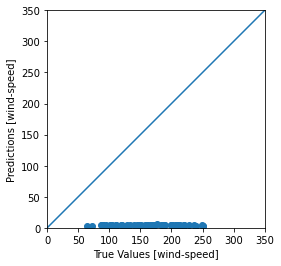

In [85]:
test_predictions = model1.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

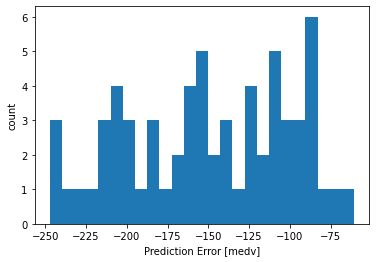

In [86]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## One hidden layer analysis

In [87]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction2.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [88]:
%%time

EPOCHS = 1000
batch_size = 6

model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

with tf.device('/CPU:0'):
    history = model2.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                70        
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 35)                385       
_________________________________________________________________
dropout_11 (Dropout)         (None, 35)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:23873.5625,  mae:149.7115,  mape:100.0578,  mse:23873.5625,  val_loss:32

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 100, loss:38437.8320,  mae:193.2276,  mape:98.2112,  mse:38437.8320,  val_loss:31562.2598,  val_mae:168.4869,  val_mape:98.0597,  val_mse:31562.2598,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 200, loss:19336.9316,  mae:135.5107,  mape:95.8607,  mse:19336.9316,  val_loss:28735.7148,  val_mae:160.0358,  val_mape:92.5226,  val_mse:28735.7148,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 300, loss:33815.7969,  mae:175.2341,  mape:84.6370,  mse:33815.7969,  val_loss:23302.7539,  val_mae:142.3755,  val_mape:80.9430,  val_mse:23302.7539,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 400, loss:17639.8613,  mae:126.1908,  mape:74.9557,  mse:17639.8613,  val_loss:15694.0029,  val_mae:113.1499,  val_mape:61.8550,  val_mse:15694.0029,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 500, loss:11435.9844,  mae:86.7546,  mape:51.6045,  mse:11435.9844,  val_loss:7824.9497,  val_mae:73.9922,  val_mape:38.8526,  val_mse:7824.9497,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 600, loss:2971.9180,  mae:48.7695,  mape:27.2635,  mse:2971.9180,  val_loss:3312.9609,  val_mae:45.8101,  val_mape:28.1217,  val_mse:3312.9609,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 700, loss:8183.3940,  mae:82.4443,  mape:61.8925,  mse:8183.3940,  val_loss:2718.3540,  val_mae:43.9229,  val_mape:31.0793,  val_mse:2718.3540,  
....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.............................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.........
Epoch: 800, loss:5065.1304,  mae:64.1186,  mape:34.8912,  mse:5065.1304,  val_loss:2701.0500,  val_mae:44.0763,  val_mape:32.0142,  val_mse:2701.0500,  
....................................................................................................
Epoch: 900, loss:8336.7500,  mae:74.6894,  mape:44.1081,  mse:8336.7500,  val_loss:2751.3459,  val_mae:44.7102,  val_mape:33.4134,  val_mse:2751.3459,  
...................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..............................................Wall time: 28min 4s


In [89]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,4484.064453,52.715176,4484.064453,33.723850,2696.081787,44.129875,2696.081787,32.601997,995
996,5084.270508,58.124676,5084.270508,30.414541,2705.714111,44.244438,2705.714111,32.788849,996
997,3431.824219,54.470398,3431.824219,41.223698,2695.259033,44.116100,2695.259033,32.580139,997
998,10407.827148,91.964867,10407.827148,43.237995,2710.061035,44.292511,2710.061035,32.870285,998
999,4853.380371,63.471256,4853.380371,43.973389,2714.927979,44.344685,2714.927979,32.955055,999


In [90]:
# Test the model after training
example_result_3 = model2.predict(normed_test_data)

## Compare the predicted values with the actual values

In [91]:
print('Predicted Values')
print(example_result_3[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[169.51967]
 [122.11889]
 [187.25003]
 [172.07019]
 [170.39285]
 [146.31546]
 [107.69042]
 [140.8796 ]
 [171.86008]
 [167.35152]]

Actual Values
165
150
160
105
214
 94
 90
 64
250
 90


In [92]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,4484.064453,52.715176,4484.064453,33.723850,2696.081787,44.129875,2696.081787,32.601997,995
996,5084.270508,58.124676,5084.270508,30.414541,2705.714111,44.244438,2705.714111,32.788849,996
997,3431.824219,54.470398,3431.824219,41.223698,2695.259033,44.116100,2695.259033,32.580139,997
998,10407.827148,91.964867,10407.827148,43.237995,2710.061035,44.292511,2710.061035,32.870285,998
999,4853.380371,63.471256,4853.380371,43.973389,2714.927979,44.344685,2714.927979,32.955055,999


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

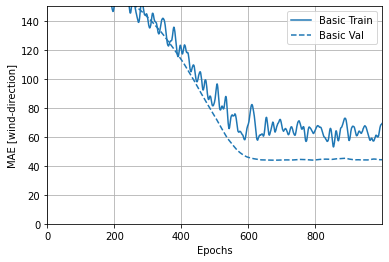

In [93]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,150])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

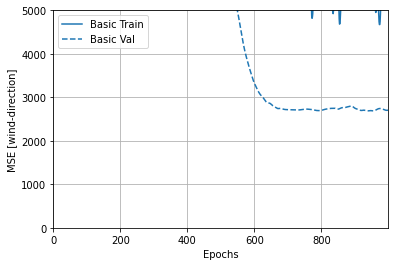

In [94]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [95]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model2.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 2571.7480 - mae: 40.8593 - mse: 2571.7480 - mape: 25.6375
Train set Mean Abs Error : 40.86
Train set Mean Square Error : 2571.75


In [96]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 2714.9277 - mae: 44.3447 - mse: 2714.9277 - mape: 32.9551
Validation set Mean Abs Error : 44.34
Validation set Mean Square Error : 2714.93


In [97]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 1858.8340 - mae: 35.8874 - mse: 1858.8340 - mape: 28.7234
Testing set Mean Abs Error : 35.89
Testing set Mean Square Error : 1858.83


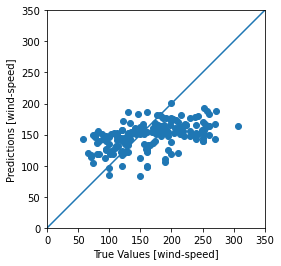

In [98]:
train_predictions = model2.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

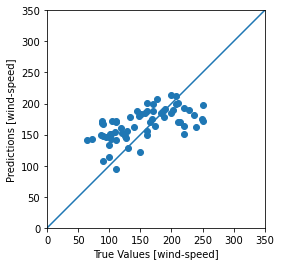

In [99]:
test_predictions = model2.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

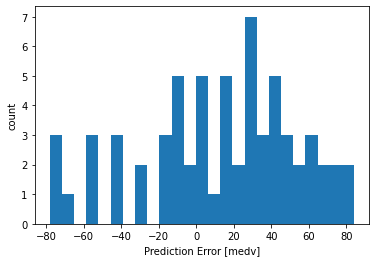

In [100]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## Four hidden layer analysis

In [101]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction3.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [114]:
%%time

EPOCHS = 1000
batch_size = 6

model3 = model3_multilayer_perceptron_with_four_hidden_layer()
print('Here is a summary of this model: ')
model3.summary()

with tf.device('/CPU:0'):
    history = model3.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_28 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_13 (Dropout)         (None, 72)                0         
_________________________________________________________________
dense_29 (Dense)    

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..
Epoch: 100, loss:5073.1499,  mae:44.1033,  mape:27.8458,  mse:5073.1499,  val_loss:2498.0872,  val_mae:42.3000,  val_mape:29.1378,  val_mse:2498.0872,  
..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.
Epoch: 200, loss:5597.1899,  mae:61.9449,  mape:30.7513,  mse:5597.1899,  val_loss:2359.7749,  val_mae:41.6735,  val_mape:30.1029,  val_mse:2359.7749,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......
Epoch: 300, loss:7145.9458,  mae:70.7676,  mape:32.9401,  mse:7145.9458,  val_loss:2261.5352,  val_mae:39.5422,  val_mape:26.8522,  val_mse:2261.5352,  
.....................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


............................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......................................
Epoch: 400, loss:1878.9232,  mae:39.3711,  mape:24.6726,  mse:1878.9232,  val_loss:2923.8435,  val_mae:42.5649,  val_mape:25.1324,  val_mse:2923.8435,  
..............................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....................................................
Epoch: 500, loss:3790.7439,  mae:58.3489,  mape:35.0352,  mse:3790.7439,  val_loss:2436.0686,  val_mae:39.4032,  val_mape:24.6117,  val_mse:2436.0686,  
....................................................................................................
Epoch: 600, loss:1322.5342,  mae:29.3903,  mape:21.2285,  mse:1322.5342,  val_loss:4090.3003,  val_mae:51.5196,  val_mape:28.4881,  val_mse:4090.3003,  
....................................................................................................
Epoch: 700, loss:3006.3730,  mae:53.4793,  mape:31.6913,  mse:3006.3730,  val_loss:3713.8284,  val_mae:48.4966,  val_mape:27.0213,  val_mse:3713.8284,  
....................................................................................................
Epoch: 800, loss:4452.5259,  mae:51.7999,  mape:38.0774,  mse:4452.5259,  val_loss:4755.4639,  val_mae:57.0731,  val_mape:31.2557,  val_mse:4755.4639,  
...............................

In [115]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,3452.298096,51.810978,3452.298096,27.466379,6262.072754,67.891800,6262.072754,37.133545,995
996,2571.930908,41.252651,2571.930908,22.537832,6439.155273,68.967865,6439.155273,37.687508,996
997,1447.892456,33.423275,1447.892456,23.391411,6680.714355,70.459740,6680.714355,38.466072,997
998,6230.115234,77.351112,6230.115234,46.690845,7249.144531,74.042702,7249.144531,40.452019,998
999,1072.928467,29.545603,1072.928467,16.542984,7239.663574,73.971748,7239.663574,40.407871,999


In [116]:
# Test the model after training
example_result_4 = model3.predict(normed_test_data)


## Compare the Actual Values with the predicted values

In [117]:
print('Predicted Values')
print(example_result_4[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[106.24098 ]
 [110.6141  ]
 [104.13361 ]
 [102.688   ]
 [ 95.911606]
 [ 61.4545  ]
 [ 92.649124]
 [ 67.93215 ]
 [132.95605 ]
 [ 98.52103 ]]

Actual Values
165
150
160
105
214
 94
 90
 64
250
 90


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

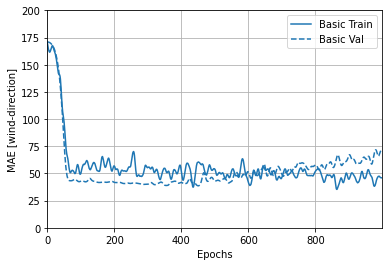

In [118]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,200])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

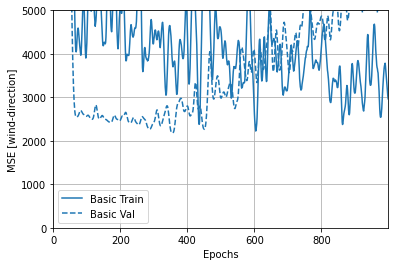

In [119]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [120]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model3.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 5363.2700 - mae: 61.3222 - mse: 5363.2700 - mape: 33.0894
Train set Mean Abs Error : 61.32
Train set Mean Square Error : 5363.27


In [121]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 7239.6631 - mae: 73.9717 - mse: 7239.6631 - mape: 40.4079
Validation set Mean Abs Error : 73.97
Validation set Mean Square Error : 7239.66


In [122]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 4744.4526 - mae: 58.4854 - mse: 4744.4526 - mape: 34.6102
Testing set Mean Abs Error : 58.49
Testing set Mean Square Error : 4744.45


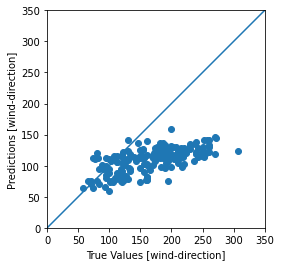

In [123]:
train_predictions = model3.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

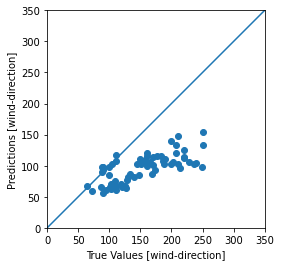

In [124]:
test_predictions = model3.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

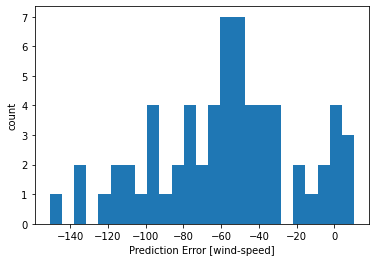

In [125]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [wind-speed]")
_ = plt.ylabel("count")